In [400]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [401]:
train=pd.read_csv("C://Users//Julek//Jupyter Notebooks//csv//train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

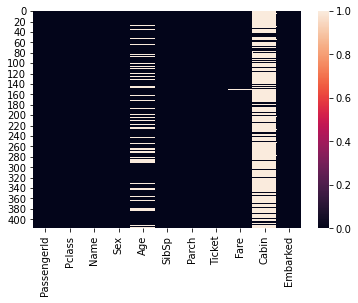

In [402]:
test=pd.read_csv("C://Users//Julek//Jupyter Notebooks//csv//test.csv")
test.head()
sns.heatmap(test.isnull())

In [404]:
test.groupby(['Sex','Pclass']).mean()

PassengerId        Age     SibSp     Parch        Fare
Sex    Pclass                                                        
female 1       1104.080000  41.333333  0.560000  0.500000  115.591168
       2       1111.200000  24.376552  0.533333  0.766667   26.438750
       3       1085.722222  23.073400  0.583333  0.597222   13.735129
male   1       1093.087719  40.520000  0.403509  0.280702   75.586551
       2       1121.142857  30.940678  0.301587  0.142857   20.184654
       3       1098.349315  24.525104  0.404110  0.328767   11.826350

In [405]:
i=0
for x in test['Age']:
    if pd.isna(x) and test['Pclass'][i]==1 and test['Sex'][i]=="female":
        test.at[i,'Age']=41
    if pd.isna(x) and test['Pclass'][i]==2 and test['Sex'][i]=="female":
        test.at[i,'Age']=24
    if pd.isna(x) and test['Pclass'][i]==3 and test['Sex'][i]=="female":
        test.at[i,'Age']=23
    if pd.isna(x) and test['Pclass'][i]==1 and test['Sex'][i]=="male":
        test.at[i,'Age']=41
    if pd.isna(x) and test['Pclass'][i]==2 and test['Sex'][i]=="male":
        test.at[i,'Age']=31
    if pd.isna(x) and test['Pclass'][i]==3 and test['Sex'][i]=="male":
        test.at[i,'Age']=25
    i+=1


<AxesSubplot:>

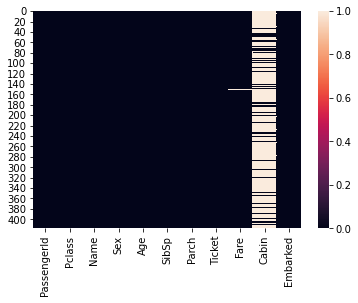

In [406]:
sns.heatmap(test.isnull())

In [407]:
test[pd.isna(test['Fare'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [408]:
test=test.drop([152])

<AxesSubplot:>

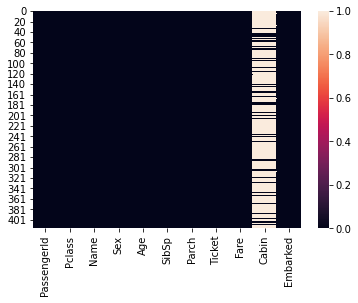

In [409]:
sns.heatmap(test.isnull())

In [412]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
print(sex)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
print(embark)
test=test.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1)
test=pd.concat([test,sex,embark],axis=1)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[417 rows x 1 columns]
     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[417 rows x 2 columns]


In [432]:
X_test=test

In [446]:
results=pd.read_csv("C://Users//Julek//Jupyter Notebooks//csv//results.csv")
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [447]:
results=results.drop([152])

In [448]:
y_test = results

In [415]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

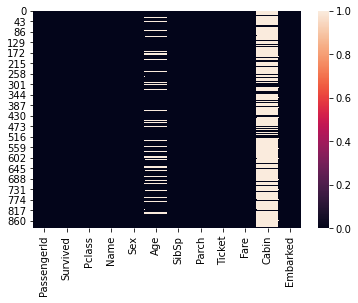

In [416]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

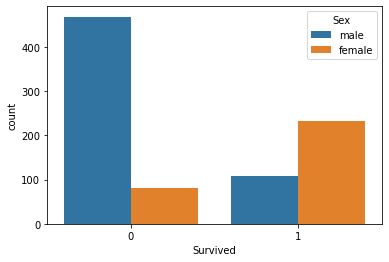

In [417]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

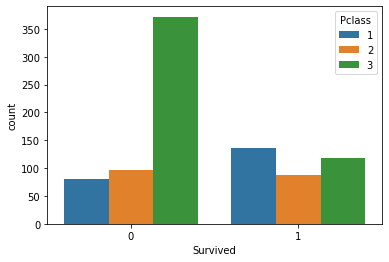

In [418]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

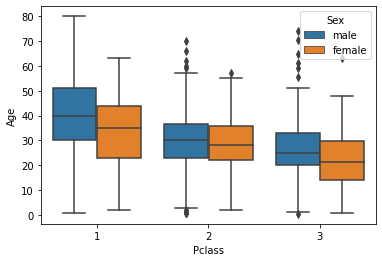

In [419]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)

In [168]:
train.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [420]:
i=0
for x in train['Age']:
    if pd.isna(x) and train['Pclass'][i]==1 and train['Sex'][i]=="female":
        train.at[i,'Age']=35
    if pd.isna(x) and train['Pclass'][i]==2 and train['Sex'][i]=="female":
        train.at[i,'Age']=29
    if pd.isna(x) and train['Pclass'][i]==3 and train['Sex'][i]=="female":
        train.at[i,'Age']=22
    if pd.isna(x) and train['Pclass'][i]==1 and train['Sex'][i]=="male":
        train.at[i,'Age']=41
    if pd.isna(x) and train['Pclass'][i]==2 and train['Sex'][i]=="male":
        train.at[i,'Age']=31
    if pd.isna(x) and train['Pclass'][i]==3 and train['Sex'][i]=="male":
        train.at[i,'Age']=27
    i+=1


<AxesSubplot:>

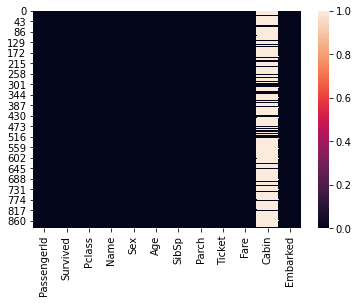

In [421]:
sns.heatmap(train.isnull())

<AxesSubplot:>

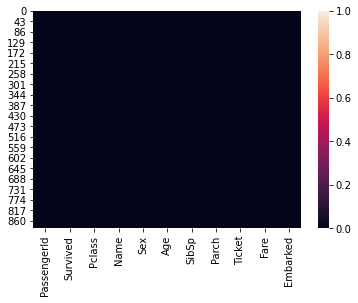

In [422]:
train=train.drop('Cabin',1)
sns.heatmap(train.isnull())

In [423]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [424]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
print(sex)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
print(embark)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]
     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [425]:
train_2=train.drop(['Name','Sex','Ticket','Embarked'],axis=1)

In [426]:
print(train_2)
train_3=pd.concat([train_2,sex,embark],axis=1)
print(train_3)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3  22.0      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1         0       3  22.0      1      0   7.2500     1  0  1
1              2         1       1  38.0      1      0  

In [427]:
from sklearn.model_selection import train_test_split

In [457]:
X_train = train_3.drop('Survived',axis=1)
y_train = train_3['Survived']
y_test = y_test['Survived']

In [435]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,22.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [436]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [452]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1e40, solver='newton-cg',max_iter=10000)
log_reg.fit(X_train,y_train)
predictions = log_reg.predict(X_test)

In [437]:
len(X_train)

891

In [438]:
len(y_train)

891

In [313]:
len(predictions)

891

In [439]:
len(X_test)

417

In [440]:
len(y_test)

418

In [460]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       265
           1       0.89      0.93      0.91       152

    accuracy                           0.93       417
   macro avg       0.92      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [458]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

In [456]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [453]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,